## **I2A2 - Desafio Análise Exploratória Titanic**
https://www.kaggle.com/c/titanic

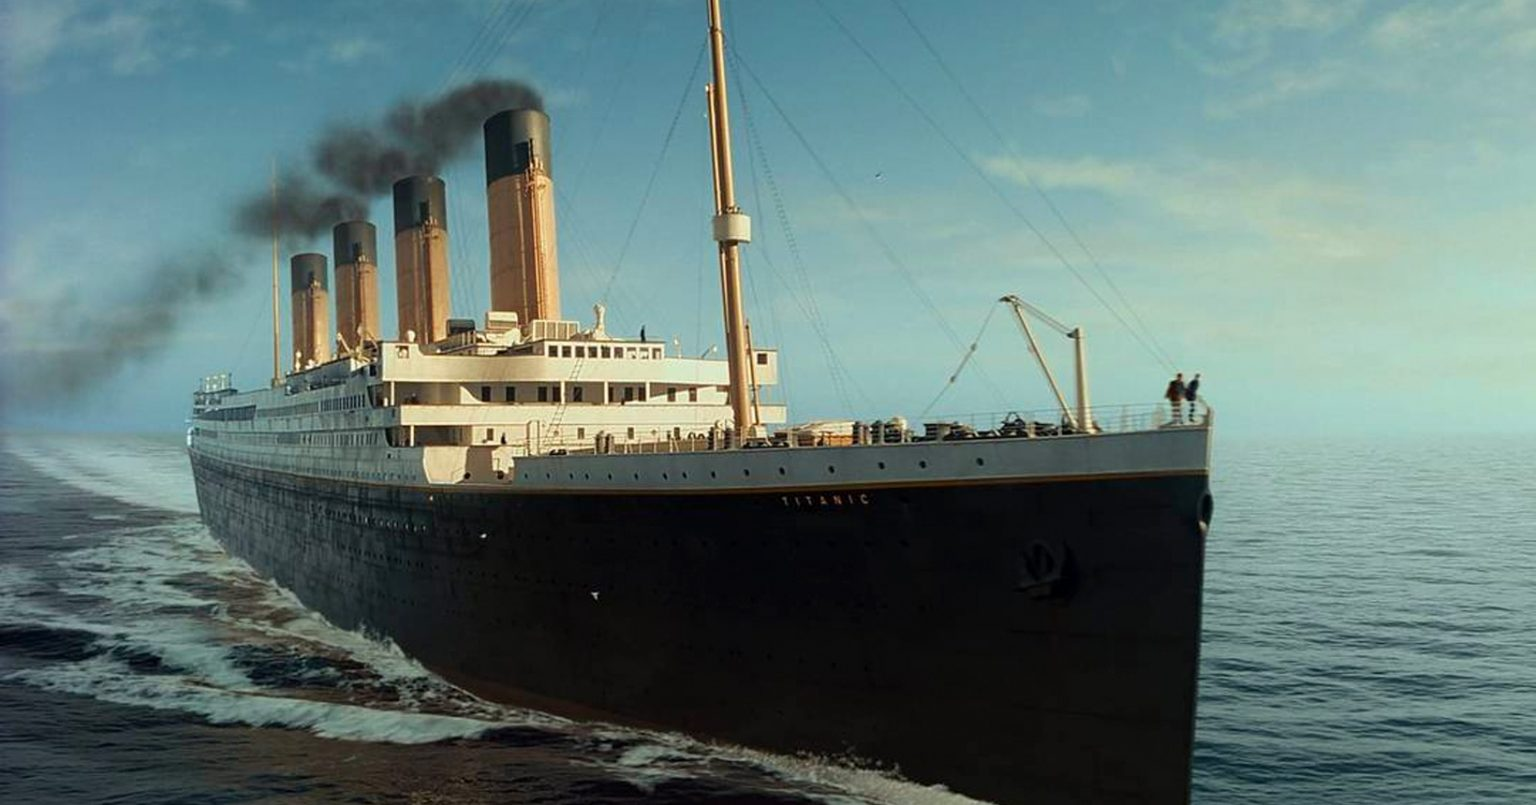

---
**Autor:** Marcos Bezerra

**GitHub:** [https://github.com/marcos-bezerra/Titanic_Kaggle](https://github.com/marcos-bezerra/Titanic_Kaggle)

**Google Drive:** [https://drive.google.com/marcos-bezerra/Titanic_Kaggle](https://drive.google.com/drive/folders/1dGXTOWsUs_B06sMvolhkQdNjGCH98in2?usp=sharing)

**Versão:** 1.0 - 13 Fev 2022

---

---
## Descrição dos dados
Variable        Definition	Key
survival	      Survival	0 = No, 1 = Yes
pclass	        Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd 
sex	            Sex
Age	            Age in years
sibsp	          # of siblings(irmãos) / spouses(cônjuges) aboard the 
Titanic
parch	          # of parents (pais)/ children(crianças) aboard the Titanic
ticket	        Ticket number
fare	          Passenger fare(tarifa)
cabin	          Cabin number
embarked	      Port of Embarkation	C = Cherbourg, Q = Queenstown, S = 
Southampton
name            Name passenger
boat
body
home.dest       destino
orig_seq</p>

---

In [1]:
# autorizando o google a acessar o drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# especificando o endereço da pasta raiz
import os
pathRaiz = '/content/drive/MyDrive/I2A2/Desafio_02_Kaggle_Titanic'
os.chdir(pathRaiz)
os.getcwd()

'/content/drive/MyDrive/I2A2/Desafio_02_Kaggle_Titanic'

In [8]:
ls -lah 

total 783K
-rw------- 1 root root 631K Feb 13 14:48 Desafio_Titanic.ipynb
-rw------- 1 root root  49K Dec 24 11:20 Test.xlsx
-rw------- 1 root root 103K Dec 24 11:20 Train.xlsx


## Análise Exploratória

In [9]:
# carregando as bibliotecas
import pandas as pd # processamento de dados
import numpy as np # algebra linear
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif

#from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectPercentile
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

In [10]:
# carregando o dataset
ds_train = pd.read_excel('Train.xlsx')

In [ ]:
df_train = ds_train.copy()

In [ ]:
# visualizando as primeiras linhas do dataframe
df_train.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


In [ ]:
# informações sobre o dataframe 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   survived        891 non-null    int64  
 3   name            891 non-null    object 
 4   sex             891 non-null    object 
 5   age             714 non-null    float64
 6   sibsp           891 non-null    int64  
 7   parch           891 non-null    int64  
 8   ticket          891 non-null    object 
 9   fare            891 non-null    float64
 10  cabin           204 non-null    object 
 11  embarked        889 non-null    object 
 12  boat            330 non-null    object 
 13  body            83 non-null     float64
 14  home.dest       499 non-null    object 
 15  orig_seq        891 non-null    int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


## Quantidade de valores nulos

In [ ]:
# total de registros nulos por atributo
df_train.isnull().sum()

Kaggle_Pass_Id      0
pclass              0
survived            0
name                0
sex                 0
age               177
sibsp               0
parch               0
ticket              0
fare                0
cabin             687
embarked            2
boat              561
body              808
home.dest         392
orig_seq            0
dtype: int64

In [ ]:
# selecionando os registros de tipo "object"
df_train.select_dtypes(include=['object']).head()

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,NaN,"Bridgerule, Devon"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,4,"New York, NY"
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,NaN,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,D,"Scituate, MA"
4,"Allen, Mr. William Henry",male,373450,NaN,S,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham"


In [ ]:
# selecionando os registros de tipo "numérico - int64 e float64
df_train.select_dtypes(include=['int64','float64']).head()

,Kaggle_Pass_Id,pclass,survived,age,sibsp,parch,fare,body,orig_seq
0,1,3,0,22.0,1,0,7.2500,NaN,690
1,2,1,1,38.0,1,0,71.2833,NaN,86
2,3,3,1,26.0,0,0,7.9250,NaN,861
3,4,1,1,35.0,1,0,53.1000,NaN,128
4,5,3,0,35.0,0,0,8.0500,NaN,619


# Analisando o atributo "survived"

In [ ]:
# valores únicos do atributo
pd.unique(df_train['survived'])

array([0, 1])

In [ ]:
# quantidade de valores nulos
df_train['survived'].isnull().sum()

0

,survived,qtde,%
0,0,549,62.0
1,1,342,38.0


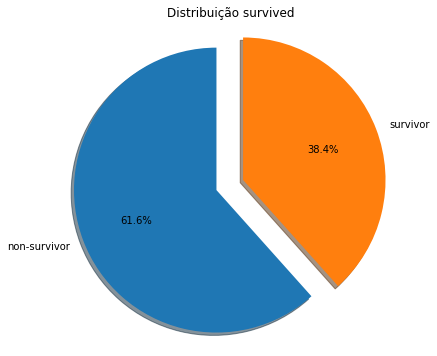

In [ ]:
# Quantidade de sobreviventes
total_surv = df_train['survived'].count()
pass_surv = df_train.groupby(['survived']).size()

part_surv = round(pass_surv / total_surv,2)*100

desc_surv = pd.concat([pass_surv, part_surv], axis=1, keys=['qtde', '%'])
display(desc_surv.head(2).reset_index())

# Gráfico da Quantidade de Passageiros por Classe
fig1,ax1 = plt.subplots(figsize=(6,6))
sizes = df_train.groupby(['survived']).size()
labels = ('non-survivor','survivor')

ax1.pie(sizes,
        explode = (0.1,0.1),
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 90
       )

ax1.set_title('Distribuição survived')
ax1.axis('equal')
plt.show()

In [26]:
# Participação de sobriviventes por classe sobre o total de passageiros do Titanic
pclass_survived = df_train.groupby(['pclass', 'survived']).agg(count=('survived', 'count'))
pclass_total = df_train.groupby(['survived']).agg({'survived':'count'})
pclass_survived.div(pclass_total, level='survived').round(2)*100

count  survived
pclass survived                 
1      0           NaN       NaN
       1           NaN       NaN
2      0           NaN       NaN
       1           NaN       NaN
3      0           NaN       NaN
       1           NaN       NaN

In [ ]:
# quantidade de sobreviventes por classe
survived_pclass = df_train.groupby(['pclass', 'survived']).agg(count=('survived', 'count')).round(0).reset_index()
survived_pclass

,pclass,survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


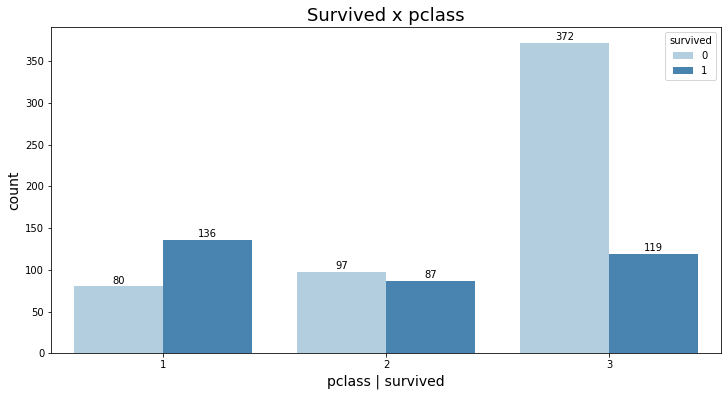

In [ ]:
# gráfico da quantidade de sobreviventes por classe
plt.figure(figsize=(12, 6)) 
splot = sns.barplot(x="pclass", 
                    y="count", 
                    hue="survived", 
                    data = survived_pclass, 
                    palette='Blues') 

for p in splot.patches:
    splot.annotate(format(round(p.get_height()),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', 
                   va='center', 
                   xytext=(0, 6), 
                   textcoords='offset points')

plt.ylabel("count", size=14) 
plt.xlabel("pclass | survived", size=14) 
plt.title("Survived x pclass", size=18)

plt.show()

# Analisando o atributo "name"

In [ ]:
# quantidade de valores nulos
df_train['name'].isnull().sum()

0

In [ ]:
# quantidade de valores duplicados
df_train['name'].duplicated().sum()

0

# Analisando o atributo "sex"

In [ ]:
# valores únicos do atributo
pd.unique(df_train['sex'])

array(['male', 'female'], dtype=object)

In [ ]:
# quantidade de valores nulos
df_train['sex'].isnull().sum()

0

In [ ]:
# Distribuição dos passageiros por genero
total_sex = df_train['sex'].count()
pass_sex = df_train.groupby(['sex']).size()

part_sex = round(pass_sex / total_sex,2)*100

desc_sex = pd.concat([pass_sex, part_sex], axis=1, keys=['qtde', '%'])
display(desc_sex.head(2).reset_index())

,sex,qtde,%
0,female,314,35.0
1,male,577,65.0


In [ ]:
# Alterando os valores no campo 'sex' para female = 0 e male = 1
df_train['sex'] = df_train['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [ ]:
# valores únicos tranformados female = 0, male = 1
pd.unique(df_train['sex'])

array([1, 0])

# Analisando o atributo age

In [ ]:
# verificando a quantidade de valores nulos
df_train['age'].isnull().sum()

177

In [ ]:
# calculo da idade média por genero
idademedia_gender = df_train.groupby(['sex'])['age'].mean().round(0)
idademedia_gender

sex
0    28.0
1    31.0
Name: age, dtype: float64

### Substituindo os valores médios calculados da idade por genero

In [ ]:
df_train.loc[(df_train['sex'] == 0) & (df_train['age'].isnull()), 'age'] = list(idademedia_gender)[0]

In [ ]:
df_train.loc[(df_train['sex'] == 1) & (df_train['age'].isnull()), 'age'] = list(idademedia_gender)[1]

In [ ]:
# valores únicos do atributo
pd.unique(df_train['sex'])

array([1, 0])

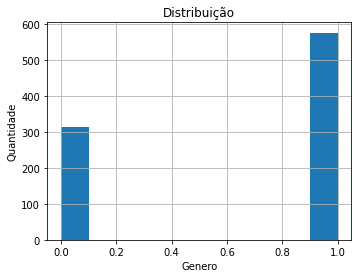

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.sex.hist()
fig.set_title('Distribuição')
fig.set_xlabel('Genero')
fig.set_ylabel('Quantidade')

plt.show()

# Analisando o atributo sibsp

In [ ]:
# valores nulos
df_train['sibsp'].isnull().sum()

0

In [ ]:
# valores únicos
pd.unique(df_train['sibsp'])

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
# Normalização dos dados
min_pclass = df_train['sibsp'].min()
max_pclass = df_train['sibsp'].max()
df_train['sibsp'] = (df_train['sibsp'] - min_pclass) / (max_pclass - min_pclass)
pd.unique(df_train['sibsp'])

array([0.125, 0.   , 0.375, 0.5  , 0.25 , 0.625, 1.   ])

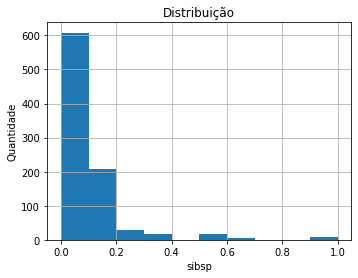

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.sibsp.hist()
fig.set_title('Distribuição')
fig.set_xlabel('sibsp')
fig.set_ylabel('Quantidade')

plt.show()

# Analisando o atributo parch

In [ ]:
# valores nulos
df_train['parch'].isnull().sum()

0

In [ ]:
# valores únicos
pd.unique(df_train['parch'])

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
# Normalização dos dados
min_pclass = df_train['parch'].min()
max_pclass = df_train['parch'].max()
df_train['parch'] = (df_train['parch'] - min_pclass) / (max_pclass - min_pclass)
pd.unique(df_train['parch'])

array([0.        , 0.16666667, 0.33333333, 0.83333333, 0.5       ,
       0.66666667, 1.        ])

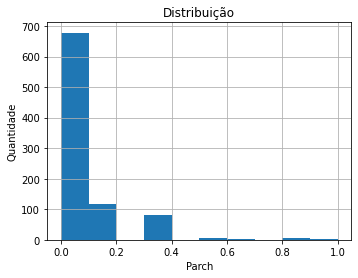

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.parch.hist()
fig.set_title('Distribuição')
fig.set_xlabel('Parch')
fig.set_ylabel('Quantidade')

plt.show()

# Analisando o atributo ticket

In [ ]:
# valores nulos
df_train['ticket'].isnull().sum()

0

In [ ]:
# descritivo do atributo ticket
df_train['ticket'].describe()

count        891
unique       688
top       347082
freq           7
Name: ticket, dtype: object

In [ ]:
df_train.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",1,22.0,0.125,0.0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0.125,0.0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",0,26.0,0.000,0.0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0.125,0.0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",1,35.0,0.000,0.0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


# Analisando o atributo fare

In [ ]:
# valores nulos
df_train['fare'].isnull().sum()

0

In [ ]:
pd.unique(df_train['fare'])

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
# descritivo do atributo
df_train['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [ ]:
# Normalização dos dados
min_pclass = df_train['fare'].min()
max_pclass = df_train['fare'].max()
df_train['fare'] = (df_train['fare'] - min_pclass) / (max_pclass - min_pclass)

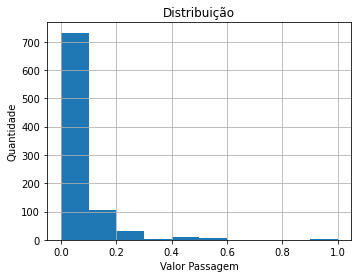

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.fare.hist()
fig.set_title('Distribuição')
fig.set_xlabel('Valor Passagem')
fig.set_ylabel('Quantidade')

plt.show()

# Analisando o atributo embarked

In [ ]:
# quantidade de valores nulos
df_train['embarked'].isnull().sum()

2

In [ ]:
# valores únicos
pd.unique(df_train['embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df_train.loc[df_train['embarked'].isnull()]

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0.0,0.0,113572,0.15615,B28,NaN,6,NaN,NaN,169
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0.0,0.0,113572,0.15615,B28,NaN,6,NaN,"Cincinatti, OH",285


In [ ]:
# verificando os passageiros da cabine B28 que tem os valores nulos
df_train.loc[df_train['cabin'] == 'B28']

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0.0,0.0,113572,0.15615,B28,NaN,6,NaN,NaN,169
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0.0,0.0,113572,0.15615,B28,NaN,6,NaN,"Cincinatti, OH",285


In [ ]:
# verificando os passageiros do ticket que tem valores nulos
df_train.loc[df_train['ticket'] == '113572']

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0.0,0.0,113572,0.15615,B28,NaN,6,NaN,NaN,169
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0.0,0.0,113572,0.15615,B28,NaN,6,NaN,"Cincinatti, OH",285


In [ ]:
# aplicando a moda para os valores faltantes da coluna embarked
df_train.loc[df_train['embarked'].isnull(), 'embarked'] = df_train.embarked.mode()[0]

In [ ]:
# calculando os valores médios por valor do campo embarked
df_train.groupby(by='embarked')['survived'].mean()

embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64

## alterando os valores do atributo 'embarked' para numéricos

In [ ]:
df_train.loc[df_train['embarked'] == 'C', 'embarked'] = 1

In [ ]:
df_train.loc[df_train['embarked'] == 'Q', 'embarked'] = 2

In [ ]:
df_train.loc[df_train['embarked'] == 'S', 'embarked'] = 3

In [ ]:
# alterando o tipo de dado de objeto para float64
df_train['embarked'] = df_train['embarked'].astype('float64')

In [ ]:
# Normalização dos dados
min_pclass = df_train['embarked'].min()
max_pclass = df_train['embarked'].max()
df_train['embarked'] = (df_train['embarked'] - min_pclass) / (max_pclass - min_pclass)

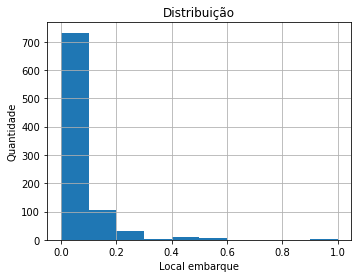

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.fare.hist()
fig.set_title('Distribuição')
fig.set_xlabel('Local embarque')
fig.set_ylabel('Quantidade')

plt.show()

# Analisando o atributo cabin

In [ ]:
# quantidade de valores nulos
df_train['cabin'].isnull().sum()

687

In [ ]:
# substituindo os valores nulos por 'N0'
df_train['cabin'] = np.where(df_train['cabin'].isnull(),'N0',df_train['cabin'])

In [ ]:
# criando uma lista com os valores únicos da coluna 'cabin''
list = pd.unique(df_train['cabin'])

In [ ]:
# Visualizando os valores únicos da coluna 'cabin'
list

array(['N0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [ ]:
# criando uma lista dos passageiros que estavam em mais de uma cabine
list_cabin=[]
for i in range(len(list)-1):
    if len(list[i]) > 4:
        list_cabin.append(list[i])
list_cabin

['C23 C25 C27',
 'F G73',
 'D10 D12',
 'B58 B60',
 'F E69',
 'C22 C26',
 'B57 B59 B63 B66',
 'B96 B98',
 'B51 B53 B55',
 'F G63',
 'C62 C64',
 'B82 B84']

In [ ]:
# visualizando a selação das cabines
df_train.loc[df_train['cabin'].isin(list_cabin)].sort_values(by=['cabin'], ascending=True)

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
872,873,1,0,"Carlsson, Mr. Frans Olof",1,33.0000,0.000,0.000000,695,0.009759,B51 B53 B55,1.0,NaN,NaN,"New York, NY",52
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0000,0.000,0.166667,PC 17755,1.000000,B51 B53 B55,0.0,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",50
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",0,21.0000,0.250,0.333333,PC 17608,0.512122,B57 B59 B63 B66,0.0,4,NaN,"Haverford, PA / Cooperstown, NY",252
311,312,1,1,"Ryerson, Miss. Emily Borie",0,18.0000,0.250,0.333333,PC 17608,0.512122,B57 B59 B63 B66,0.0,4,NaN,"Haverford, PA / Cooperstown, NY",251
118,119,1,0,"Baxter, Mr. Quigg Edmond",1,24.0000,0.000,0.166667,PC 17558,0.483128,B58 B60,0.0,NaN,NaN,"Montreal, PQ",17
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",0,50.0000,0.000,0.166667,PC 17558,0.483128,B58 B60,0.0,6,NaN,"Montreal, PQ",18
789,790,1,0,"Guggenheim, Mr. Benjamin",1,46.0000,0.000,0.000000,PC 17593,0.154588,B82 B84,0.0,NaN,NaN,"New York, NY",143
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",0,36.0000,0.125,0.333333,113760,0.234224,B96 B98,1.0,4,NaN,"Bryn Mawr, PA",58
435,436,1,1,"Carter, Miss. Lucile Polk",0,14.0000,0.125,0.333333,113760,0.234224,B96 B98,1.0,4,NaN,"Bryn Mawr, PA",56
802,803,1,1,"Carter, Master. William Thornton II",1,11.0000,0.125,0.333333,113760,0.234224,B96 B98,1.0,4,NaN,"Bryn Mawr, PA",55


In [ ]:
# validando os valores da cabine 'D'
df_train.loc[df_train['cabin'] == 'D']

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
292,293,2,0,"Levy, Mr. Rene Jacques",1,36.0,0.0,0.0,SC/Paris 2163,0.025130,D,0.0,NaN,NaN,"Montreal, PQ",486
327,328,2,1,"Ball, Mrs. (Ada E Hall)",0,36.0,0.0,0.0,28551,0.025374,D,1.0,10,NaN,"Bristol, Avon / Jacksonville, FL",334
473,474,2,1,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",0,23.0,0.0,0.0,SC/AH Basle 541,0.026920,D,0.0,11,NaN,"New York, NY",466


In [ ]:
# validando os valores da cabine 'T'
df_train.loc[df_train['cabin'] == 'T']

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
339,340,1,0,"Blackwell, Mr. Stephen Weart",1,45.0,0.0,0.0,113784,0.069291,T,1.0,NaN,NaN,"Trenton, NJ",31


In [ ]:
# alterando para uma identificação de cabine
df_train['cabin']= df_train['cabin'].replace(
    ['C23 C25 C27','F G73','D10 D12','B58 B60','F E69','C22 C26','B57 B59 B63 B66','B96 B98','B51 B53 B55','F G63','C62 C64','B82 B84','D','T'],
    ['C23','F73','D10','B58','F69','C22','B57','B96','B51','F63','C62','B82','D0','T0'])

In [ ]:
# excluindo a primeira letra da cabine
df_train['cabin'] = df_train['cabin'].str[1:].str.lower().str.strip()

In [ ]:
pd.unique(df_train['cabin'])

array(['0', '85', '123', '46', '6', '103', '56', '23', '78', '33', '30',
       '52', '28', '83', '73', '31', '5', '10', '26', '110', '58', '101',
       '69', '47', '86', '2', '19', '7', '49', '4', '32', '80', '36',
       '15', '93', '35', '87', '77', '67', '94', '125', '99', '118', '22',
       '106', '65', '54', '57', '34', '18', '124', '91', '40', '128',
       '37', '50', '82', '96', '44', '104', '111', '92', '38', '21', '12',
       '63', '14', '20', '79', '25', '95', '39', '70', '16', '68', '41',
       '9', '48', '126', '71', '51', '62', '24', '90', '45', '8', '121',
       '11', '3', '17', '102', '42', '148'], dtype=object)

In [ ]:
# alterando o tipo de dados da coluna 'cabin' para inteiro
df_train['cabin'] = df_train['cabin'].astype('float64')

In [ ]:
# normalizando os valores pelo valor máximo do atributo 'body'
df_train['cabin'].isnull().sum()

0

In [ ]:
# Normalização dos dados
min_pclass = df_train['cabin'].min()
max_pclass = df_train['cabin'].max()
df_train['cabin'] = (df_train['cabin'] - min_pclass) / (max_pclass - min_pclass)

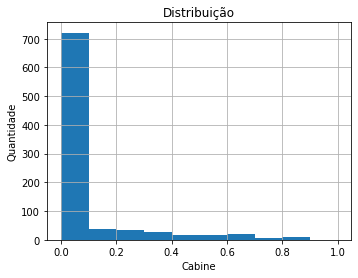

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.cabin.hist()
fig.set_title('Distribuição')
fig.set_xlabel('Cabine')
fig.set_ylabel('Quantidade')

plt.show()

# Analisando o campo boat

In [ ]:
df_train['boat'].isnull().sum()

561

In [ ]:
list_boat = pd.unique(df_train['boat'])
list_boat

array([nan, '4', 'D', '15', '13', '8', '14', 'C', '7', '6', '3', '16',
       '12', '10', '11', 'B', '5', 'A', '9', 'C D', '2', '1', '13 15 B',
       '5 7', 2, '5 9'], dtype=object)

In [ ]:
for i in list_boat: print(i)

nan
4
D
15
13
8
14
C
7
6
3
16
12
10
11
B
5
A
9
C D
2
1
13 15 B
5 7
2
5 9


In [ ]:
# substituindo os valores nulos por 'N0'
df_train['boat'] = np.where(df_train['boat']=='A',100,df_train['cabin'])
df_train['boat'] = np.where(df_train['boat']=='B',101,df_train['cabin'])
df_train['boat'] = np.where(df_train['boat']=='C',102,df_train['cabin'])
df_train['boat'] = np.where(df_train['boat']=='D',103,df_train['cabin'])
df_train['boat'] = np.where(df_train['boat']=='C D',104,df_train['cabin'])
df_train['boat'] = np.where(df_train['boat']=='13 15 B',105,df_train['cabin'])
df_train['boat'] = np.where(df_train['boat']=='5 7',5,df_train['cabin'])
df_train['boat'] = np.where(df_train['boat']=='5 9',5,df_train['cabin'])

In [ ]:
# alterando o tipo de dados da coluna 'cabin' para inteiro
df_train['boat'] = df_train['boat'].astype('float64')

In [ ]:
# aplicando a moda para os valores faltantes da coluna boat
df_train.loc[df_train['boat'].isnull(), 'boat'] = df_train.boat.mode()[0]

In [ ]:
# Normalização dos dados
min_pclass = df_train['boat'].min()
max_pclass = df_train['boat'].max()
df_train['boat'] = (df_train['boat'] - min_pclass) / (max_pclass - min_pclass)

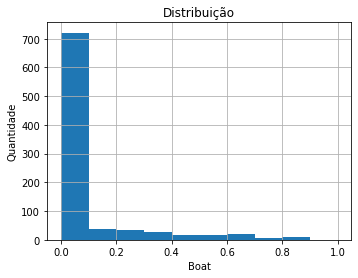

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.boat.hist()
fig.set_title('Distribuição')
fig.set_xlabel('Boat')
fig.set_ylabel('Quantidade')

plt.show()

# Analisando os valores do campo "body"

In [ ]:
pd.unique(df_train['body'])

array([ nan, 175.,   4., 322.,  38., 234., 181., 309., 283., 169., 285.,
        98., 207., 328., 171.,  43.,  51.,   7., 101.,  15., 174., 201.,
       255., 245.,  75.,  18., 143., 312., 305., 108., 230., 110., 188.,
       306., 166., 147., 236., 295.,  72., 314., 232., 156., 103., 165.,
       249., 275., 271., 258.,  22., 173.,  68.,  62., 263., 287., 206.,
        47.,  17., 197.,  69.,  46., 122., 256.,  97., 284.,  89., 130.,
       120.,  19.,  37., 149.,  14., 172., 269., 190., 176.,  61.,  52.,
       126.,  79.,  50., 259., 196., 155., 327.])

In [ ]:
# quantidade de valores nulos
df_train['body'].isnull().sum()

808

In [ ]:
# aplicando a moda para os valores faltantes da coluna body
df_train.loc[df_train['body'].isnull(), 'body'] = df_train.body.mode()[0]

In [ ]:
# Normalização dos dados
min_pclass = df_train['body'].min()
max_pclass = df_train['body'].max()
df_train['body'] = (df_train['body'] - min_pclass) / (max_pclass - min_pclass)

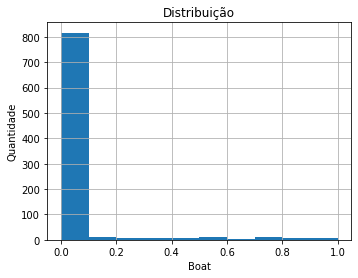

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.body.hist()
fig.set_title('Distribuição')
fig.set_xlabel('Boat')
fig.set_ylabel('Quantidade')

plt.show()

## Analisando o campo home.dest

In [ ]:
# alterando o nome do campo
df_train.rename(columns={'home.dest': 'home_dest'}, inplace = True)

In [ ]:
df_train['home_dest'].duplicated().sum()

599

In [ ]:
df_train['home_dest'].isnull().sum()

392

# Analisando o atributo "pclass"

In [ ]:
df_train.groupby('pclass').ngroups

3

In [ ]:
pd.unique(df_train['pclass'])

array([3, 1, 2])

In [ ]:
df_train['pclass'].isnull().sum()

0

,pclass,Qtde,%
0,1,216,24.0
1,2,184,21.0
2,3,491,55.0


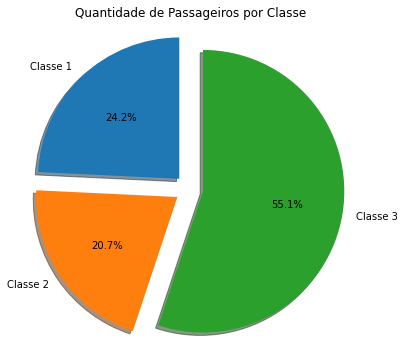

In [ ]:
# Quantidade de passageiros por Classe
total_pass = df_train['pclass'].count()
pass_pclass = df_train.groupby(['pclass']).size()

part = round(pass_pclass / total_pass,2)*100

part_pclass = pd.concat([pass_pclass, part], axis=1, keys=['Qtde', '%'])
display(part_pclass.reset_index())

# Gráfico da Quantidade de Passageiros por Classe
fig1,ax1 = plt.subplots(figsize=(6,6))
sizes = df_train.groupby(['pclass']).size()
labels = ('Classe 1','Classe 2','Classe 3')

ax1.pie(sizes,
        explode = (0.1,0.1,0.1),
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 90
       )

ax1.set_title('Quantidade de Passageiros por Classe')
ax1.axis('equal')
plt.show()

In [ ]:
# Normalização dos dados
min_pclass = df_train['pclass'].min()
max_pclass = df_train['pclass'].max()
df_train['pclass'] = (df_train['pclass'] - min_pclass) / (max_pclass - min_pclass)

In [ ]:
pd.unique(df_train['pclass'])

array([1. , 0. , 0.5])

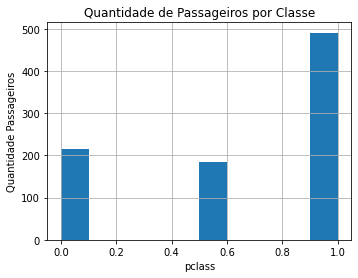

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.pclass.hist()
fig.set_title('Quantidade de Passageiros por Classe')
fig.set_xlabel('pclass')
fig.set_ylabel('Quantidade Passageiros')

plt.show()

# Analisando o campo orig_seq

In [ ]:
df_train['orig_seq'].isnull().sum()

0

In [ ]:
df_train['orig_seq'].duplicated().sum()

0

In [ ]:
# Normalização dos dados
min_pclass = df_train['orig_seq'].min()
max_pclass = df_train['orig_seq'].max()
df_train['orig_seq'] = (df_train['orig_seq'] - min_pclass) / (max_pclass - min_pclass)

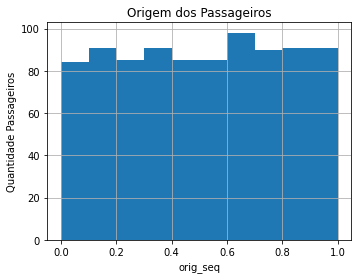

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
fig = df_train.orig_seq.hist()
fig.set_title('Origem dos Passageiros')
fig.set_xlabel('orig_seq')
fig.set_ylabel('Quantidade Passageiros')

plt.show()

## Posição final das análises por campo

In [ ]:
df_train.isnull().sum()

Kaggle_Pass_Id      0
pclass              0
survived            0
name                0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
cabin               0
embarked            0
boat                0
body                0
home_dest         392
orig_seq            0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  891 non-null    int64  
 1   pclass          891 non-null    float64
 2   survived        891 non-null    int64  
 3   name            891 non-null    object 
 4   sex             891 non-null    int64  
 5   age             891 non-null    float64
 6   sibsp           891 non-null    float64
 7   parch           891 non-null    float64
 8   ticket          891 non-null    object 
 9   fare            891 non-null    float64
 10  cabin           891 non-null    float64
 11  embarked        891 non-null    float64
 12  boat            891 non-null    float64
 13  body            891 non-null    float64
 14  home_dest       499 non-null    object 
 15  orig_seq        891 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 111.5+ KB


In [ ]:
df_train.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,orig_seq
0,1,1.0,0,"Braund, Mr. Owen Harris",1,22.0,0.125,0.0,A/5 21171,0.014151,0.000000,1.0,0.000000,0.0,"Bridgerule, Devon",0.526758
1,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0.125,0.0,PC 17599,0.139136,0.574324,0.0,0.574324,0.0,"New York, NY",0.064985
2,3,1.0,1,"Heikkinen, Miss. Laina",0,26.0,0.000,0.0,STON/O2. 3101282,0.015469,0.000000,1.0,0.000000,0.0,NaN,0.657492
3,4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0.125,0.0,113803,0.103644,0.831081,1.0,0.831081,0.0,"Scituate, MA",0.097095
4,5,1.0,0,"Allen, Mr. William Henry",1,35.0,0.000,0.0,373450,0.015713,0.000000,1.0,0.000000,0.0,"Lower Clapton, Middlesex or Erdington, Birmingham",0.472477


## Analisando a relação das colunas com a variável alvo

In [ ]:
# esta análise é realizada somente com os campos numéricos
df_train_num = df_train.select_dtypes(include=['int64','float64'])
df_train_num.head(3)

,Kaggle_Pass_Id,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,orig_seq
0,1,1.0,0,1,22.0,0.125,0.0,0.014151,0.000000,1.0,0.000000,0.0,0.526758
1,2,0.0,1,0,38.0,0.125,0.0,0.139136,0.574324,0.0,0.574324,0.0,0.064985
2,3,1.0,1,0,26.0,0.000,0.0,0.015469,0.000000,1.0,0.000000,0.0,0.657492


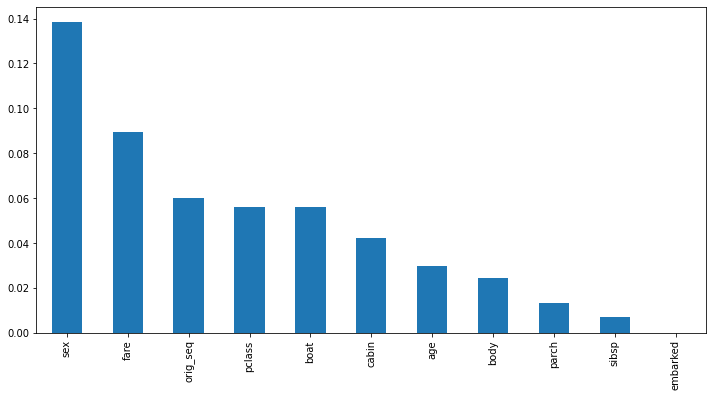

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_num.drop(['survived','Kaggle_Pass_Id'], axis=1), 
df_train_num['survived'],test_size = 0.2, random_state = 42)

# Quanto menor o valor, menor é a relação com a variável target
rel = mutual_info_classif(X_train.fillna(0), y_train)
rel = pd.Series(rel)
rel.index = X_train.columns
rel = rel.sort_values(ascending = False)
rel.plot.bar()
plt.show()

In [ ]:
# selecionando os registros de tipo "object"
df_train.select_dtypes(include=['object']).head()

,name,ticket,home_dest
0,"Braund, Mr. Owen Harris",A/5 21171,"Bridgerule, Devon"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,"New York, NY"
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,"Scituate, MA"
4,"Allen, Mr. William Henry",373450,"Lower Clapton, Middlesex or Erdington, Birmingham"


In [ ]:
df_train = df_train.drop(['Kaggle_Pass_Id','name','ticket','home_dest','boat','embarked','body','orig_seq','sibsp'], axis=1)

In [ ]:
df_train.head()

,pclass,survived,sex,age,parch,fare,cabin
0,1.0,0,1,22.0,0.0,0.014151,0.000000
1,0.0,1,0,38.0,0.0,0.139136,0.574324
2,1.0,1,0,26.0,0.0,0.015469,0.000000
3,0.0,1,0,35.0,0.0,0.103644,0.831081
4,1.0,0,1,35.0,0.0,0.015713,0.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    float64
 1   survived  891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   parch     891 non-null    float64
 5   fare      891 non-null    float64
 6   cabin     891 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 48.9 KB


## Histograma

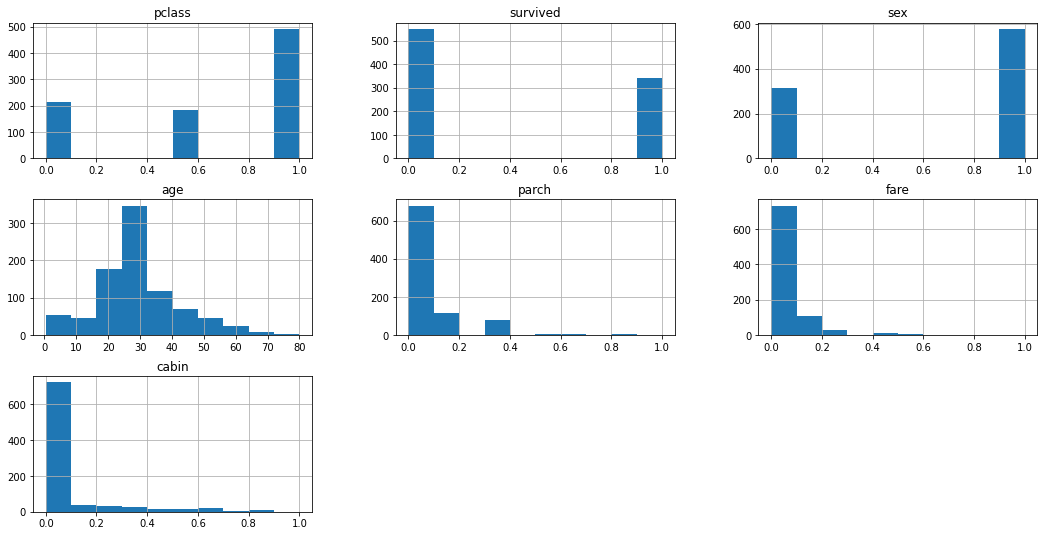

In [ ]:
df_train.hist(figsize=(18,9))
plt.show()

In [ ]:
# Importando as bibliotecas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
features = df_train.drop(['survived'],axis=1)
labels = df_train['survived']

In [ ]:
# Holdout -> dividindo a base em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [ ]:
# Funções para o cálculo das médias
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y_hat, predictions):
    mae = mean_absolute_error(y_hat, predictions)
    mse = mean_squared_error(y_hat, predictions)
    rmse = np.sqrt(mean_squared_error(y_hat, predictions))
    r_squared = r2_score(y_hat, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","Accuracy","RMSE(Cross-Validation)"])

In [ ]:
# Stochastic Gradient Descent (SGD)

# Treinando o modelo
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

# Método de predição forest
predictions = sgd.predict(X_test)

# Calculo da acurácia
acc_score = sgd.score(X_train, y_train)
print("Accuracy:", acc_score)

# Calculo dos erros
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(sgd)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SGD Classifier","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


Accuracy: 0.3707865168539326
MAE: 0.5865921787709497
MSE: 0.5865921787709497
RMSE: 0.7658930596179533
R2 Score: -1.4189189189189189
------------------------------
RMSE Cross-Validation: 0.7048767954215494


In [ ]:
#Support Vector Machines
svr = SVR(C=1000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
acc_score = svr.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVC","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.25411615936268195
MSE: 0.16684266084913318
RMSE: 0.40846378156347374
R2 Score: 0.3119941188845462
Accuracy: 0.34636880913113577
----------------------------------------
RMSE Cross-Validation: 0.4054036059400291


In [ ]:
#Random Forest Classificador
rf_clas = RandomForestClassifier(n_estimators=1000)
rf_clas.fit(X_train, y_train)
predictions = rf_clas.predict(X_test)
acc_score = rf_clas.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(rf_clas)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestClassifier","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.20670391061452514
MSE: 0.20670391061452514
RMSE: 0.454647017602145
R2 Score: 0.14761904761904754
Accuracy: 0.9845505617977528
----------------------------------------
RMSE Cross-Validation: 0.4227399595499164


In [ ]:
# Logistic Regression
lr_clas = LogisticRegression()
lr_clas.fit(X_train, y_train)
predictions = lr_clas.predict(X_test)
acc_score = lr_clas.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(lr_clas)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Logistic Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.20670391061452514
MSE: 0.20670391061452514
RMSE: 0.454647017602145
R2 Score: 0.14761904761904754
Accuracy: 0.7991573033707865
----------------------------------------
RMSE Cross-Validation: 0.45666715045364337


In [ ]:
#K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
acc_score = knn.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(knn)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "K Nearest Neighbor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.22346368715083798
MSE: 0.22346368715083798
RMSE: 0.47271945924706543
R2 Score: 0.0785070785070785
Accuracy: 0.8764044943820225
----------------------------------------
RMSE Cross-Validation: 0.4641125251438095


In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
predictions = gaussian.predict(X_test)
acc_score = gaussian.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(gaussian)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Gaussian Naive Bayes","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.24022346368715083
MSE: 0.24022346368715083
RMSE: 0.4901259671626783
R2 Score: 0.009395109395109347
Accuracy: 0.7752808988764045
----------------------------------------
RMSE Cross-Validation: 0.4881551288324733


In [ ]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)
acc_score = perceptron.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(perceptron)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Perceptron","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.5865921787709497
MSE: 0.5865921787709497
RMSE: 0.7658930596179533
R2 Score: -1.4189189189189189
Accuracy: 0.3693820224719101
----------------------------------------
RMSE Cross-Validation: 0.6961333553327773


In [ ]:
# Linear Support Vector Machine
linear_svc = Perceptron(max_iter=5)
linear_svc.fit(X_train, y_train)
predictions = linear_svc.predict(X_test)
acc_score = linear_svc.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(linear_svc)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Linear SVC","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.5865921787709497
MSE: 0.5865921787709497
RMSE: 0.7658930596179533
R2 Score: -1.4189189189189189
Accuracy: 0.3693820224719101
----------------------------------------
RMSE Cross-Validation: 0.6961333553327773


In [ ]:
# Decision Tree
decision_tree = Perceptron(max_iter=5)
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
acc_score = decision_tree.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*40)
rmse_cross_val = rmse_cv(decision_tree)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Decision Tree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.5865921787709497
MSE: 0.5865921787709497
RMSE: 0.7658930596179533
R2 Score: -1.4189189189189189
Accuracy: 0.3693820224719101
----------------------------------------
RMSE Cross-Validation: 0.6961333553327773


In [ ]:
# XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
acc_score = xgb.score(X_train, y_train)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Accuracy:", acc_score)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cv(xgb))

new_row = {"Model": "XGBClassifier","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Accuracy": acc_score,"RMSE(Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.18994413407821228
MSE: 0.18994413407821228
RMSE: 0.43582580703557733
R2 Score: 0.2167310167310167
Accuracy: 0.8806179775280899
------------------------------
RMSE Cross-Validation: 0.425809984469636


In [ ]:
print("MAE (Mean Absolut Error - Erro Médio Absoluto) menor melhor:",)
print("MSE (Mean Squared Error - Erro Quadrático Médio) menor melhor:",)
print("RMSE (Root Mean Squared Error - Erro Raiz Quadrática Média) melhor melhor):")
print("R2 Score - um r-quadrado mais alto indica um melhor ajuste para o modelo")
print("RMSE Cross-Validation - menor melhor")

MAE (Mean Absolut Error - Erro Médio Absoluto) menor melhor:
MSE (Mean Squared Error - Erro Quadrático Médio) menor melhor:
RMSE (Root Mean Squared Error - Erro Raiz Quadrática Média) melhor melhor):
R2 Score - um r-quadrado mais alto indica um melhor ajuste para o modelo
RMSE Cross-Validation - menor melhor


In [ ]:
# Comparação entre os modelos
# O menor resultado do erro quadrático médio (RMSE) é o melhor modelo.
models.sort_values(by="RMSE(Cross-Validation)",ascending=True)

,Model,MAE,MSE,RMSE,R2 Score,Accuracy,RMSE(Cross-Validation)
1,SVC,0.254116,0.166843,0.408464,0.311994,0.346369,0.405404
2,RandomForestClassifier,0.206704,0.206704,0.454647,0.147619,0.984551,0.422740
9,XGBClassifier,0.189944,0.189944,0.435826,0.216731,0.880618,0.425810
3,Logistic Regression,0.206704,0.206704,0.454647,0.147619,0.799157,0.456667
4,K Nearest Neighbor,0.223464,0.223464,0.472719,0.078507,0.876404,0.464113
5,Gaussian Naive Bayes,0.240223,0.240223,0.490126,0.009395,0.775281,0.488155
6,Perceptron,0.586592,0.586592,0.765893,-1.418919,0.369382,0.696133
7,Linear SVC,0.586592,0.586592,0.765893,-1.418919,0.369382,0.696133
8,Decision Tree,0.586592,0.586592,0.765893,-1.418919,0.369382,0.696133
0,SGD Classifier,0.586592,0.586592,0.765893,-1.418919,0.370787,0.704877


Accuracy: 0.8806 %


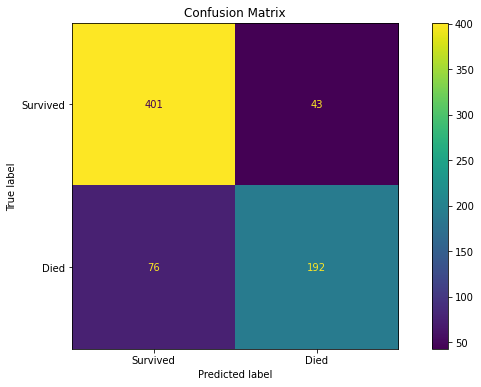

In [ ]:
# XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
acc_score = xgb.score(X_train, y_train)
print('Accuracy:',round(acc_score,4,), "%")

# Confusion Matrix
predictions = cross_val_predict(xgb, X_train, y_train, cv=7)
conf_matrix = confusion_matrix(y_train, predictions)

cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['Survived' ,'Died'])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, r2_score , f1_score, accuracy_score, fbeta_score

print("Recall:",round(recall_score(y_train, predictions),4)*100)
print("Precision:", round(precision_score(y_train, predictions),4)*100)
print("R2:",round(r2_score(y_train,predictions),4)*100)
print("F1 Score:", round(f1_score(y_train, predictions),4)*100)
print("ACC:", round(accuracy_score(y_train, predictions),4)*100)
print("fbeta score", round(fbeta_score(y_train, predictions, beta=2),4)*100)

Recall: 71.64
Precision: 81.69999999999999
R2: 28.799999999999997
F1 Score: 76.34
ACC: 83.28999999999999
fbeta score 73.45


In [ ]:
#Random Forest Classificador
random_forest = RandomForestClassifier(n_estimators=1000, random_state = 42, oob_score = True)

# Método de predição
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

# Calculo dos erros absolutos
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 4))

# Cálculo da acurácia
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 4)
print('Accuracy:',round(acc_random_forest,4,), "%")

Mean Absolute Error: 0.2067
Accuracy: 98.4551 %


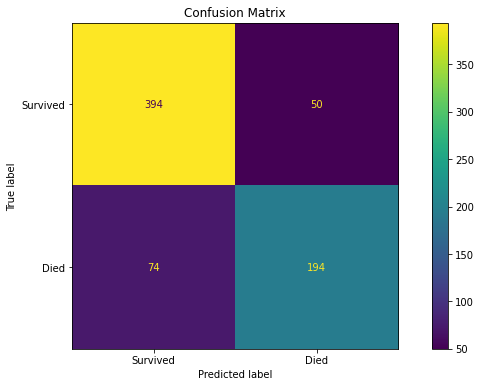

In [ ]:
# Confusion Matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=7)
conf_matrix = confusion_matrix(y_train, predictions)

cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['Survived' ,'Died'])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, r2_score , f1_score, accuracy_score, fbeta_score

print("Recall:",round(recall_score(y_train, predictions),4)*100)
print("Precision:", round(precision_score(y_train, predictions),4)*100)
print("R2:",round(r2_score(y_train,predictions),4)*100)
print("F1 Score:", round(f1_score(y_train, predictions),4)*100)
print("ACC:", round(accuracy_score(y_train, predictions),4)*100)
print("fbeta score", round(fbeta_score(y_train, predictions, beta=2),4)*100)

Recall: 72.39
Precision: 79.51
R2: 25.8
F1 Score: 75.78
ACC: 82.58
fbeta score 73.71
